In [ ]:
!pip install nltk

In [ ]:
import nltk


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk import FreqDist, bigrams, ConditionalFreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.text import Text
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Reading the text file
with open('/content/drive/MyDrive/Dream to the Moon.txt', 'r', encoding='utf-8') as file:
    raw = file.read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(raw)

ಮೊಮ್ಮಗನ ಹೆಸರು ಬಾಬು. ಅವನಿಗೆ ಚಿಕ್ಕಂದಿನಿಂದಲೇ ಚಂದ್ರನ ಬಗ್ಗೆ ಆಕರ್ಷಣೆ ಇತ್ತು. ಬಾಬು ತುಂಬಾ ಚಿಕನ್ ಬೆಚ್ಚಗೆ ಇಡುತ್ತಿದ್ದನು, ಚಂದ್ರನೋ ಚಂದನೋ ಹೇಳಿದರೆ ಅವನ ಮುಖದಲ್ಲಿ ಹಾಸ್ಯ ಮೂಡುತ್ತಿತ್ತು. 

ಹೊಂದುವಳಿಯಲ್ಲಿ ಒಮ್ಮೆ ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ ಚಂದ್ರನಿಗೆ ಹೋಗುವ ಕನಸು ಕಂಡ. "ಅಪ್ಪ, ಅಮ್ಮ! ನಾವು ಚಂದ್ರನಿಗೆ ಹೋಗಬೇಕಷ್ಟೇ!" ಎಂದು ಬಾಬು ಆಕಾಂಕ್ಷೆಯಿಂದ ಕೇಳಿದ. ಅವನ ತಂದೆ-ತಾಯಿ ಬಾಬುವಿನ ತಾತ್ಸಾರದಿಂದ ಅನುಮಾನಿಸುತ್ತಿದ್ದರು ಆದರೆ ಅವರ ಬಾಲದ ಕಥೆ ಕೇಳಿದ ನಂತರ ಅವರು ದಿವಸ ಪಯಣಕ್ಕೆ ರೆಡಿಯಾದರು.

ಒಂದು ಅಮಾವಾಸ್ಯೆಯ ರಾತ್ರಿ, ನಕ್ಷತ್ರಗಳು ಪ್ರಕಾಶಮೀನಿದ್ದರು. ಬಾಬು, ತಂದೆ-ತಾಯಿ, ಮೂರು ಜನರು ಆಕಾಶದತ್ತ ದಿಟ್ಟಿಸಿ ನೋಡಿದರು. "ನಾವು ಈಗ ಚಂದ್ರನಿಗೆ ಹೋಗುವುದು ಹೇಗೆ?" ಎಂದು ಬಾಬು ಕೇಳಿದ. ಅವರ ತಂದೆ ನಗೆ ಬಿಟ್ಟರು. "ಬಾಬು, ನಾವು ಒಂದು ವಿಶೇಷ ವಿಮಾನವನ್ನು ಬಳಸುತ್ತೇವೆ," ಎಂದು ಹೇಳಿದರು. 

ಅಗಸಿಯ ವಿಮಾನದಲ್ಲಿ ಏರಿದ ಮೇಲೆ, ಅವರು ಸ್ಪೇಸ್ ಸೂಟ್ಸ್ ತೊಟ್ಟು, ಉಡಾಯಿಸಲು ಸಜ್ಜಾದರು. ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು ಅಪ್ಪುಗೆ ಹಿಡಿದರು, "ನನಗೆ ಚಂದ್ರನನ್ನು ನೋಡಲು ಅಸ್ತು ಇಷ್ಟವಿದೆ!" 

ಉಡಾಯಿಸಿದ ಬಳಿಕ, ಅವರು ಭೂಮಿಯತ್ತ ತಿರುಗಿ ನೋಡಿ, ಅದು ಒಂದು ಚೆನ್ನಾಗಿ ಬೆಳಗುತ್ತಿದ್ದ ನಕ್ಷತ್ರದಂತೆ ಕಂಡಿತ್ತು. ಬಾಬುವಿಗೆ ಇದು ಒ೦ದಾದ ಬಿಸಾಡುರಾಗಿತ್ತು. 

ಅದಾದ ಮೇಲೆ, ಬಾಬು ಚಂದ್ರನ ಮೇಲೆ ಅವತರಣೆ ಮಾಡಿದನು.

In [ ]:
len(raw)

6342

In [ ]:
type(raw)

str

In [ ]:
# Tokenization
tokens = word_tokenize(raw)
print(tokens)

['ಮೊಮ್ಮಗನ', 'ಹೆಸರು', 'ಬಾಬು', '.', 'ಅವನಿಗೆ', 'ಚಿಕ್ಕಂದಿನಿಂದಲೇ', 'ಚಂದ್ರನ', 'ಬಗ್ಗೆ', 'ಆಕರ್ಷಣೆ', 'ಇತ್ತು', '.', 'ಬಾಬು', 'ತುಂಬಾ', 'ಚಿಕನ್', 'ಬೆಚ್ಚಗೆ', 'ಇಡುತ್ತಿದ್ದನು', ',', 'ಚಂದ್ರನೋ', 'ಚಂದನೋ', 'ಹೇಳಿದರೆ', 'ಅವನ', 'ಮುಖದಲ್ಲಿ', 'ಹಾಸ್ಯ', 'ಮೂಡುತ್ತಿತ್ತು', '.', 'ಹೊಂದುವಳಿಯಲ್ಲಿ', 'ಒಮ್ಮೆ', 'ಬಾಬು', 'ತನ್ನ', 'ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗುವ', 'ಕನಸು', 'ಕಂಡ', '.', '``', 'ಅಪ್ಪ', ',', 'ಅಮ್ಮ', '!', 'ನಾವು', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗಬೇಕಷ್ಟೇ', '!', "''", 'ಎಂದು', 'ಬಾಬು', 'ಆಕಾಂಕ್ಷೆಯಿಂದ', 'ಕೇಳಿದ', '.', 'ಅವನ', 'ತಂದೆ-ತಾಯಿ', 'ಬಾಬುವಿನ', 'ತಾತ್ಸಾರದಿಂದ', 'ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಆದರೆ', 'ಅವರ', 'ಬಾಲದ', 'ಕಥೆ', 'ಕೇಳಿದ', 'ನಂತರ', 'ಅವರು', 'ದಿವಸ', 'ಪಯಣಕ್ಕೆ', 'ರೆಡಿಯಾದರು', '.', 'ಒಂದು', 'ಅಮಾವಾಸ್ಯೆಯ', 'ರಾತ್ರಿ', ',', 'ನಕ್ಷತ್ರಗಳು', 'ಪ್ರಕಾಶಮೀನಿದ್ದರು', '.', 'ಬಾಬು', ',', 'ತಂದೆ-ತಾಯಿ', ',', 'ಮೂರು', 'ಜನರು', 'ಆಕಾಶದತ್ತ', 'ದಿಟ್ಟಿಸಿ', 'ನೋಡಿದರು', '.', '``', 'ನಾವು', 'ಈಗ', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗುವುದು', 'ಹೇಗೆ', '?', "''", 'ಎಂದು', 'ಬಾಬು', 'ಕೇಳಿದ', '.', 'ಅವರ', 'ತಂದೆ', 'ನಗೆ', 'ಬಿಟ್ಟರು', '.', '``', 'ಬಾಬು', ',', 'ನಾವು', 'ಒಂದು', 'ವಿಶೇಷ', 'ವಿಮಾನವನ್ನು', 'ಬಳಸುತ್ತೇವೆ', '

In [ ]:
len(tokens)

969

In [ ]:
sent_tokenize(raw)

['ಮೊಮ್ಮಗನ ಹೆಸರು ಬಾಬು.',
 'ಅವನಿಗೆ ಚಿಕ್ಕಂದಿನಿಂದಲೇ ಚಂದ್ರನ ಬಗ್ಗೆ ಆಕರ್ಷಣೆ ಇತ್ತು.',
 'ಬಾಬು ತುಂಬಾ ಚಿಕನ್ ಬೆಚ್ಚಗೆ ಇಡುತ್ತಿದ್ದನು, ಚಂದ್ರನೋ ಚಂದನೋ ಹೇಳಿದರೆ ಅವನ ಮುಖದಲ್ಲಿ ಹಾಸ್ಯ ಮೂಡುತ್ತಿತ್ತು.',
 'ಹೊಂದುವಳಿಯಲ್ಲಿ ಒಮ್ಮೆ ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ ಚಂದ್ರನಿಗೆ ಹೋಗುವ ಕನಸು ಕಂಡ.',
 '"ಅಪ್ಪ, ಅಮ್ಮ!',
 'ನಾವು ಚಂದ್ರನಿಗೆ ಹೋಗಬೇಕಷ್ಟೇ!"',
 'ಎಂದು ಬಾಬು ಆಕಾಂಕ್ಷೆಯಿಂದ ಕೇಳಿದ.',
 'ಅವನ ತಂದೆ-ತಾಯಿ ಬಾಬುವಿನ ತಾತ್ಸಾರದಿಂದ ಅನುಮಾನಿಸುತ್ತಿದ್ದರು ಆದರೆ ಅವರ ಬಾಲದ ಕಥೆ ಕೇಳಿದ ನಂತರ ಅವರು ದಿವಸ ಪಯಣಕ್ಕೆ ರೆಡಿಯಾದರು.',
 'ಒಂದು ಅಮಾವಾಸ್ಯೆಯ ರಾತ್ರಿ, ನಕ್ಷತ್ರಗಳು ಪ್ರಕಾಶಮೀನಿದ್ದರು.',
 'ಬಾಬು, ತಂದೆ-ತಾಯಿ, ಮೂರು ಜನರು ಆಕಾಶದತ್ತ ದಿಟ್ಟಿಸಿ ನೋಡಿದರು.',
 '"ನಾವು ಈಗ ಚಂದ್ರನಿಗೆ ಹೋಗುವುದು ಹೇಗೆ?"',
 'ಎಂದು ಬಾಬು ಕೇಳಿದ.',
 'ಅವರ ತಂದೆ ನಗೆ ಬಿಟ್ಟರು.',
 '"ಬಾಬು, ನಾವು ಒಂದು ವಿಶೇಷ ವಿಮಾನವನ್ನು ಬಳಸುತ್ತೇವೆ," ಎಂದು ಹೇಳಿದರು.',
 'ಅಗಸಿಯ ವಿಮಾನದಲ್ಲಿ ಏರಿದ ಮೇಲೆ, ಅವರು ಸ್ಪೇಸ್ ಸೂಟ್ಸ್ ತೊಟ್ಟು, ಉಡಾಯಿಸಲು ಸಜ್ಜಾದರು.',
 'ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು ಅಪ್ಪುಗೆ ಹಿಡಿದರು, "ನನಗೆ ಚಂದ್ರನನ್ನು ನೋಡಲು ಅಸ್ತು ಇಷ್ಟವಿದೆ!"',
 'ಉಡಾಯಿಸಿದ ಬಳಿಕ, ಅವರು ಭೂಮಿಯತ್ತ ತಿರುಗಿ ನೋಡಿ, ಅದು ಒಂದು ಚೆನ್ನಾಗಿ ಬೆಳಗುತ್ತಿದ್ದ ನಕ್ಷತ್ರದಂತೆ ಕಂಡಿತ್ತು.',
 'ಬಾಬುವಿಗೆ ಇದು ಒ೦ದಾ

In [ ]:
# Remove spaces used for accuracy
from nltk.text import Text
text = Text(tokens)
print(text)

<Text: ಮೊಮ್ಮಗನ ಹೆಸರು ಬಾಬು . ಅವನಿಗೆ ಚಿಕ್ಕಂದಿನಿಂದಲೇ ಚಂದ್ರನ ಬಗ್ಗೆ...>


In [ ]:
# Concordance
text.concordance('ಬಾಬು')

Displaying 25 of 53 matches:
                       ಮೊಮ್ಮಗನ ಹೆಸರು ಬಾಬು . ಅವನಿಗೆ ಚಿಕ್ಕಂದಿನಿಂದಲೇ ಚಂದ್ರನ ಬಗ್ಗೆ ಆಕ
ಕ್ಕಂದಿನಿಂದಲೇ ಚಂದ್ರನ ಬಗ್ಗೆ ಆಕರ್ಷಣೆ ಇತ್ತು . ಬಾಬು ತುಂಬಾ ಚಿಕನ್ ಬೆಚ್ಚಗೆ ಇಡುತ್ತಿದ್ದನು , ಚಂದ್ರನ
 ಹಾಸ್ಯ ಮೂಡುತ್ತಿತ್ತು . ಹೊಂದುವಳಿಯಲ್ಲಿ ಒಮ್ಮೆ ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ ಚಂದ್ರನಿಗೆ ಹೋಗುವ
 ! ನಾವು ಚಂದ್ರನಿಗೆ ಹೋಗಬೇಕಷ್ಟೇ ! '' ಎಂದು ಬಾಬು ಆಕಾಂಕ್ಷೆಯಿಂದ ಕೇಳಿದ . ಅವನ ತಂದೆ-ತಾಯಿ ಬಾ
ಯೆಯ ರಾತ್ರಿ , ನಕ್ಷತ್ರಗಳು ಪ್ರಕಾಶಮೀನಿದ್ದರು . ಬಾಬು , ತಂದೆ-ತಾಯಿ , ಮೂರು ಜನರು ಆಕಾಶದತ್ತ ದಿಟ್ಟ
 ಈಗ ಚಂದ್ರನಿಗೆ ಹೋಗುವುದು ಹೇಗೆ ? '' ಎಂದು ಬಾಬು ಕೇಳಿದ . ಅವರ ತಂದೆ ನಗೆ ಬಿಟ್ಟರು . `` ಬಾಬ
ಾಬು ಕೇಳಿದ . ಅವರ ತಂದೆ ನಗೆ ಬಿಟ್ಟರು . `` ಬಾಬು , ನಾವು ಒಂದು ವಿಶೇಷ ವಿಮಾನವನ್ನು ಬಳಸುತ್ತೇವ
ಸ್ಪೇಸ್ ಸೂಟ್ಸ್ ತೊಟ್ಟು , ಉಡಾಯಿಸಲು ಸಜ್ಜಾದರು . ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು ಅಪ್ಪುಗೆ ಹಿಡಿದರು , 
ದು ಒ೦ದಾದ ಬಿಸಾಡುರಾಗಿತ್ತು . ಅದಾದ ಮೇಲೆ , ಬಾಬು ಚಂದ್ರನ ಮೇಲೆ ಅವತರಣೆ ಮಾಡಿದನು . ಚಂದ್ರನ ತಂ
. ಚಂದ್ರನ ತಂಗಾಳಿ ಇಳಕೊಳ್ಳುವ ತಾತ್ಸಾರದಿಂದ , ಬಾಬು ತಮ್ಮ ತಂದೆ-ತಾಯಿಗಳಿಗೆ ಸಂತೋಷದಿಂದ `` ನೋಡಿ
ಪರ್ವತಗಳು ! '' ಎಂದು ಹೇಳಿದ . ಒಂದು ದಿನ , ಬಾಬು ಅವರ ಜತೆಸಾರಿದರೂ ಊಟ ಮಾಡುತ್ತಿದ್ದಾಗ , ಅಲ್ಲಿ
ುವ ನೀರಿನ ಭದ್ರತೆಯನ್ನು ಚೆನ್ನಾಗಿ ಅವಲೋಕಿಸಲು ಬಾಬು ಒಂ

In [ ]:
# Extract unique words from the document
unique_words = set(tokens)
print(f"Total unique words: {len(unique_words)}")
print(f"Sample words: {list(unique_words)[:30]}")  # Display first 30 unique words


Total unique words: 407
Sample words: ['ಅಸ್ತು', 'ಹಳ್ಳನಿಂದ', 'ತಮ್ಮ', 'ತಾತ್ತ್ವಿಕ', 'ಬೆಳ್ಳಿಯ', 'ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಬೆಳಗುತ್ತಿದ್ದ', 'ನೀಲಿಯ', 'ಪ್ರಪಂಚದಲ್ಲಿ', 'ಕಣ್ಮರೆಯಾಗಿದ್ದನು', 'ಮಧ್ಯೆಯೇ', 'ಬಾಬುವನ್ನು', 'ಪಯಣದ', 'ಹಳ್ಳಕ್ಕೆ', 'ಕಾತರದಿಂದ', 'ಮುನ್ನುಗ್ಗುವ', 'ನಿರಂತರವಾಗಿ', 'ನಾನಿನ್ನೇ', 'ಅಲ್ಲಿ', 'ಅವಕಾಶ', 'ಅದನ್ನು', 'ಕಂಡು', 'ನಿರತರಾಗುತ್ತಿದ್ದ', 'ಧೈರ್ಯ', 'ಹೇಗೆ', 'ಮೂಲಕ', 'ರೆಡಿಯಾದರು', 'ಅಲ್ಲಿಯ', 'ನೋಡಿದರು', 'ಹೇಳಿದ']


In [ ]:
text.similar(' ')

No matches


In [ ]:
text.common_contexts(['ತಂದೆ-ತಾಯಿಗಳು', 'ಬಾಬು'])

('The following word(s) were not found:', 'ತಂದೆ-ತಾಯಿಗಳು ಬಾಬು')


In [ ]:
text.collocations()

ಬಾಬು ತನ್ನ; ಬಾಹ್ಯ ಪ್ರಪಂಚದ; ಬಾಹ್ಯ ಪ್ರಪಂಚವನ್ನು; ಒಂದು ದಿನ; ತನ್ನ
ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ; ಪ್ರತಿಯೊಂದು ಕ್ಷಣವನ್ನು; ಬಾಹ್ಯ ಪ್ರಪಂಚದಲ್ಲಿ; ಚಂದ್ರನ
ಮೇಲೆ; ತನ್ನ ಕನಸುಗಳನ್ನು; ತಂದೆ-ತಾಯಿಗಳ ಜೊತೆ; ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು; ಮುಳುಗಿದ
ಬಾಬು; ಎಂದು ಬಾಬು; ನಿರಂತರ ಪಯಣವನ್ನು; ಪಯಣವನ್ನು ಮುಂದುವರಿಸಿದ; ಮೇಲೆ ಕಾಲಿಟ್ಟ;
ತನ್ನ ತಂದೆ-ತಾಯಿಗಳಿಗೆ; ಹಳ್ಳದಲ್ಲಿ ಮುಳುಗಿದ; ಧೈರ್ಯದಿಂದ ಹೇಳಿದ; ತನ್ನ
ತಂದೆ-ತಾಯಿಗಳ


In [ ]:
from nltk import bigrams
bigram = list(bigrams(tokens))
print(bigram)

[('ಮೊಮ್ಮಗನ', 'ಹೆಸರು'), ('ಹೆಸರು', 'ಬಾಬು'), ('ಬಾಬು', '.'), ('.', 'ಅವನಿಗೆ'), ('ಅವನಿಗೆ', 'ಚಿಕ್ಕಂದಿನಿಂದಲೇ'), ('ಚಿಕ್ಕಂದಿನಿಂದಲೇ', 'ಚಂದ್ರನ'), ('ಚಂದ್ರನ', 'ಬಗ್ಗೆ'), ('ಬಗ್ಗೆ', 'ಆಕರ್ಷಣೆ'), ('ಆಕರ್ಷಣೆ', 'ಇತ್ತು'), ('ಇತ್ತು', '.'), ('.', 'ಬಾಬು'), ('ಬಾಬು', 'ತುಂಬಾ'), ('ತುಂಬಾ', 'ಚಿಕನ್'), ('ಚಿಕನ್', 'ಬೆಚ್ಚಗೆ'), ('ಬೆಚ್ಚಗೆ', 'ಇಡುತ್ತಿದ್ದನು'), ('ಇಡುತ್ತಿದ್ದನು', ','), (',', 'ಚಂದ್ರನೋ'), ('ಚಂದ್ರನೋ', 'ಚಂದನೋ'), ('ಚಂದನೋ', 'ಹೇಳಿದರೆ'), ('ಹೇಳಿದರೆ', 'ಅವನ'), ('ಅವನ', 'ಮುಖದಲ್ಲಿ'), ('ಮುಖದಲ್ಲಿ', 'ಹಾಸ್ಯ'), ('ಹಾಸ್ಯ', 'ಮೂಡುತ್ತಿತ್ತು'), ('ಮೂಡುತ್ತಿತ್ತು', '.'), ('.', 'ಹೊಂದುವಳಿಯಲ್ಲಿ'), ('ಹೊಂದುವಳಿಯಲ್ಲಿ', 'ಒಮ್ಮೆ'), ('ಒಮ್ಮೆ', 'ಬಾಬು'), ('ಬಾಬು', 'ತನ್ನ'), ('ತನ್ನ', 'ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ'), ('ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ', 'ಚಂದ್ರನಿಗೆ'), ('ಚಂದ್ರನಿಗೆ', 'ಹೋಗುವ'), ('ಹೋಗುವ', 'ಕನಸು'), ('ಕನಸು', 'ಕಂಡ'), ('ಕಂಡ', '.'), ('.', '``'), ('``', 'ಅಪ್ಪ'), ('ಅಪ್ಪ', ','), (',', 'ಅಮ್ಮ'), ('ಅಮ್ಮ', '!'), ('!', 'ನಾವು'), ('ನಾವು', 'ಚಂದ್ರನಿಗೆ'), ('ಚಂದ್ರನಿಗೆ', 'ಹೋಗಬೇಕಷ್ಟೇ'), ('ಹೋಗಬೇಕಷ್ಟೇ', '!'), ('!', "''"), ("''", 'ಎಂದು'), ('ಎಂದು', 'ಬಾಬು'), ('ಬಾಬು', 'ಆಕಾಂಕ್ಷೆಯಿಂದ'), ('ಆಕಾಂಕ್ಷೆಯಿಂದ',

In [ ]:
list(bigrams(['ಬಾಹ್ಯ  ', 'ಪ್ರಪಂಚದ ', 'ಒಂದು  ', 'ದಿನ ', 'ಪ್ರತಿಯೊಂದು  ','ಕ್ಷಣವನ್ನು ']))


[('ಬಾಹ್ಯ  ', 'ಪ್ರಪಂಚದ '),
 ('ಪ್ರಪಂಚದ ', 'ಒಂದು  '),
 ('ಒಂದು  ', 'ದಿನ '),
 ('ದಿನ ', 'ಪ್ರತಿಯೊಂದು  '),
 ('ಪ್ರತಿಯೊಂದು  ', 'ಕ್ಷಣವನ್ನು ')]

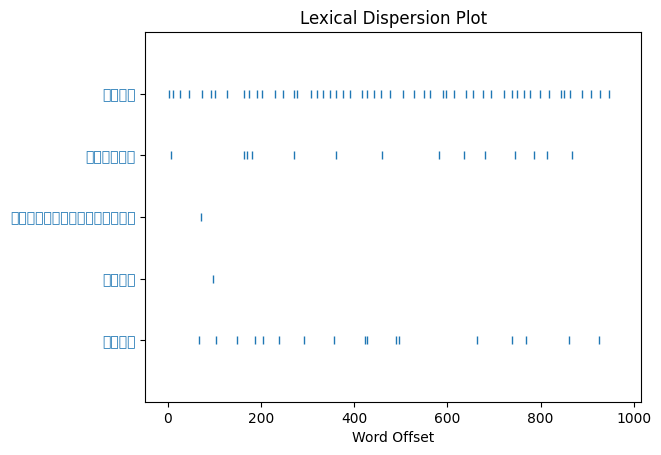

In [ ]:
import warnings
warnings.filterwarnings('ignore')

text.dispersion_plot(['ಬಾಬು', 'ಚಂದ್ರನ','ಪ್ರಕಾಶಮೀನಿದ್ದರು','ತಂದೆ','ಒಂದು'])

In [ ]:
text.generate()

ತನ್ನ ಅದ್ಭುತ ಸಂಚಲನಗಳನ್ನು ಅನುಭವಿಸುತ್ತಿದ್ದ . , ಬಾಬು ಚಂದ್ರನ ಅನುಭವವನ್ನು
ಮತ್ತೊಮ್ಮೆ ಹಾಲಿಸಲು ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದ . `` ನನಗೆ ಚಂದ್ರನನ್ನು ನೋಡಲು ಅಸ್ತು
ಇಷ್ಟವಿದೆ ! '' `` ಚಂದ್ರನಿಗೆ ನಾವು ಹೋದ ಆ ಕ್ಷಣಗಳನ್ನು ಎಂದೆಂದೂ ಮರೆಯಲಾರೆ , ''
ಎಂದನು . ಮರುಸಮಾಧಿಯಲ್ಲಿರುವ ನದಿಯ ಹನಿಗಳನ್ನು ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು
ನೆನೆಯುತ್ತಾ , ನೀರಿನಲ್ಲಿ ಬಲು ಆನಂದಿತನಾಗಿದ್ದ . ಎಂದು ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳ
ಜೊತೆ ಚಂದ್ರನ ಮೇಲೆ ಅವತರಣೆ ಮಾಡಿದನು . ಕನಸುಗಳನ್ನು ಮತ್ತಷ್ಟು ಗಾಢವಾಗಿ
ಅನುಭವಿಸುತ್ತಿದ್ದ . , ತಂದೆ-ತಾಯಿ , ಮೂರು ಜನರು ಆಕಾಶದತ್ತ ದಿಟ್ಟಿಸಿ ನೋಡಿದರು .
ಎಂದ . ಹೇಗೆ ? '' ತಂದೆ-ತಾಯಿ ಬಾಬುವಿನ ತಾತ್ಸಾರದಿಂದ ಅನುಮಾನಿಸುತ್ತಿದ್ದರು ಆದರೆ
ಅವರ ಬಾಲದ ಕಥೆ ಕೇಳಿದ ನಂತರ ಅವರು ದಿವಸ ಪಯಣಕ್ಕೆ ರೆಡಿಯಾದರು . ಮುಳುಗಿದ್ದುದು , ಆ
ಬೆಳಕನ್ನು ಮತ್ತೊಮ್ಮೆ ತಲುಪಲು ತನ್ನ ನಿರಂತರ ಪಯಣವನ್ನು ಮುಂದುವರಿಸುತ್ತಾ ,


Building ngram index...


"ತನ್ನ ಅದ್ಭುತ ಸಂಚಲನಗಳನ್ನು ಅನುಭವಿಸುತ್ತಿದ್ದ . , ಬಾಬು ಚಂದ್ರನ ಅನುಭವವನ್ನು\nಮತ್ತೊಮ್ಮೆ ಹಾಲಿಸಲು ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದ . `` ನನಗೆ ಚಂದ್ರನನ್ನು ನೋಡಲು ಅಸ್ತು\nಇಷ್ಟವಿದೆ ! '' `` ಚಂದ್ರನಿಗೆ ನಾವು ಹೋದ ಆ ಕ್ಷಣಗಳನ್ನು ಎಂದೆಂದೂ ಮರೆಯಲಾರೆ , ''\nಎಂದನು . ಮರುಸಮಾಧಿಯಲ್ಲಿರುವ ನದಿಯ ಹನಿಗಳನ್ನು ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳನ್ನು\nನೆನೆಯುತ್ತಾ , ನೀರಿನಲ್ಲಿ ಬಲು ಆನಂದಿತನಾಗಿದ್ದ . ಎಂದು ಬಾಬು ತನ್ನ ತಂದೆ-ತಾಯಿಗಳ\nಜೊತೆ ಚಂದ್ರನ ಮೇಲೆ ಅವತರಣೆ ಮಾಡಿದನು . ಕನಸುಗಳನ್ನು ಮತ್ತಷ್ಟು ಗಾಢವಾಗಿ\nಅನುಭವಿಸುತ್ತಿದ್ದ . , ತಂದೆ-ತಾಯಿ , ಮೂರು ಜನರು ಆಕಾಶದತ್ತ ದಿಟ್ಟಿಸಿ ನೋಡಿದರು .\nಎಂದ . ಹೇಗೆ ? '' ತಂದೆ-ತಾಯಿ ಬಾಬುವಿನ ತಾತ್ಸಾರದಿಂದ ಅನುಮಾನಿಸುತ್ತಿದ್ದರು ಆದರೆ\nಅವರ ಬಾಲದ ಕಥೆ ಕೇಳಿದ ನಂತರ ಅವರು ದಿವಸ ಪಯಣಕ್ಕೆ ರೆಡಿಯಾದರು . ಮುಳುಗಿದ್ದುದು , ಆ\nಬೆಳಕನ್ನು ಮತ್ತೊಮ್ಮೆ ತಲುಪಲು ತನ್ನ ನಿರಂತರ ಪಯಣವನ್ನು ಮುಂದುವರಿಸುತ್ತಾ ,"

In [ ]:
len(text)

969

In [ ]:
print(set(text))

{'ಅಸ್ತು', 'ಹಳ್ಳನಿಂದ', 'ತಮ್ಮ', 'ತಾತ್ತ್ವಿಕ', 'ಬೆಳ್ಳಿಯ', 'ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಬೆಳಗುತ್ತಿದ್ದ', 'ನೀಲಿಯ', 'ಪ್ರಪಂಚದಲ್ಲಿ', 'ಕಣ್ಮರೆಯಾಗಿದ್ದನು', 'ಮಧ್ಯೆಯೇ', 'ಬಾಬುವನ್ನು', 'ಪಯಣದ', 'ಹಳ್ಳಕ್ಕೆ', 'ಕಾತರದಿಂದ', 'ಮುನ್ನುಗ್ಗುವ', 'ನಿರಂತರವಾಗಿ', 'ನಾನಿನ್ನೇ', 'ಅಲ್ಲಿ', 'ಅವಕಾಶ', 'ಅದನ್ನು', 'ಕಂಡು', 'ನಿರತರಾಗುತ್ತಿದ್ದ', 'ಧೈರ್ಯ', 'ಹೇಗೆ', 'ಮೂಲಕ', 'ರೆಡಿಯಾದರು', 'ಅಲ್ಲಿಯ', 'ನೋಡಿದರು', 'ಹೇಳಿದ', 'ಬೆಳ್ಳಿಯಂತೆ', 'ದೃಶ್ಯಗಳು', 'ನು', 'ಜೀವನವನ್ನು', 'ಇದ್ದ', 'ತಿನ್ನುವುದಾದ', 'ಮರೆಯಲಾರೆ', 'ತಂದೆ-ತಾಯಿಗಳಿಗೆ', 'ಭದ್ರತೆಯನ್ನು', 'ಕ್ಷಣವನ್ನು', 'ಹಳ್ಳನ', 'ಹಾಗೂ', 'ಸೆಳೆದು', 'ತಲುಪಲು', 'ಚಮತ್ಕಾರ', 'ಕಣ್ಮರೆಯಾಗಿದ್ದ', 'ಬಗ್ಗೆ', 'ಸೆಳೆಯುವ', 'ಬಿಟ್ಟರು', 'ತಾತ್ಸಾರದಿಂದ', 'ಬಲು', 'ಮನಸ್ಸು', 'ಕನಸುಗಳನ್ನು', ',', 'ನೆನೆಸಿದಾಗ', 'ನಿರಂತರವಾದ', 'ಬಿಸಾಡುರಾಗಿತ್ತು', 'ಕಳೆದುಕೊಂಡ', 'ನಿರಂತರ', 'ಕಾಣುವ', 'ಕರೆದೊಯ್ಯುವ', 'ಉಲ್ಲಾಸದ', 'ತೋರಿಸಿತ್ತು', 'ಸಾಗರದಲ್ಲಿ', 'ನಂಬಲಾರದ', 'ತುಂಬಾ', 'ಹಾಲಿಸಲು', 'ಹಾಳು', 'ತಿರುಳುತ್ತಿತ್ತು', 'ಹೊಸ', 'ತಪ್ಪುವ', 'ಎದೆ', 'ಕಣ್ಣೀರಿಗೆ', 'ಆದಿಪಿತಾರೊಂದಿಗೆ', 'ಸ್ಪೇಸ್', 'ಆನಂದಿತನಾಗಿದ್ದ', 'ತಕ್ಷಣವೇ', 'ಅವಲೋಕಿಸಲು', 'ತನ್ನಿ', 'ಉಡಾಯಿಸಲು', 'ಮಾಡದೆ', 'ಅದಾದ', 'ಆಳವಾಗಿ', 'ಕಾಲಿಟ್ಟ', 'ಬಾಹ್ಯ', 'ತಂದೆ-ತಾಯಿ', 

In [ ]:
def lexical_diversity(text):
   return len(set(text)) / len(text)

In [ ]:
lexical_diversity(text)

0.4200206398348813

In [ ]:
# Frequency Distributions
from nltk import FreqDist

fdist1 = FreqDist(text)
print(fdist1)

<FreqDist with 407 samples and 969 outcomes>


In [ ]:
fdist1.most_common(50)


[(',', 84),
 ('.', 77),
 ('ಬಾಬು', 53),
 ('ತನ್ನ', 48),
 ('ಒಂದು', 17),
 ('``', 16),
 ("''", 16),
 ('ಚಂದ್ರನ', 14),
 ('ಎಂದು', 14),
 ('ಬಾಹ್ಯ', 11),
 ('ಮತ್ತೆ', 11),
 ('ಅಲ್ಲಿ', 10),
 ('ಬಾಬುವಿಗೆ', 9),
 ('ಹೇಳಿದ', 9),
 ('ಆ', 8),
 ('ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ', 7),
 ('ಅವರು', 7),
 ('ಮೇಲೆ', 7),
 ('!', 6),
 ('ನೀರಿನಲ್ಲಿ', 6),
 ('ಕನಸುಗಳನ್ನು', 6),
 ('ಚಂದ್ರನಿಗೆ', 5),
 ('ಕಂಡ', 5),
 ('ನಾವು', 5),
 ('ತಂದೆ-ತಾಯಿಗಳಿಗೆ', 5),
 ('ಅವನು', 5),
 ('ಕನಸುಗಳ', 5),
 ('ಮತ್ತೊಮ್ಮೆ', 5),
 ('ಮತ್ತಷ್ಟು', 5),
 ('ಬೆಳಕನ್ನು', 5),
 ('ಅವನ', 4),
 ('ತಂದೆ-ತಾಯಿ', 4),
 ('ತಾತ್ಸಾರದಿಂದ', 4),
 ('ಅವರ', 4),
 ('ತಂದೆ-ತಾಯಿಗಳನ್ನು', 4),
 ('ನೋಡಿ', 4),
 ('ದಿನ', 4),
 ('ಹಳ್ಳದ', 4),
 ('ಹೋದ', 4),
 ('ನೋಡಿದ', 4),
 ('ಪ್ರಪಂಚವನ್ನು', 4),
 ('ಪ್ರಪಂಚದ', 4),
 ('ಮುಳುಗಿದ', 4),
 ('ಅವನಿಗೆ', 3),
 ('ಕೇಳಿದ', 3),
 ('ಆದರೆ', 3),
 ('ತಮ್ಮ', 3),
 ('ನೆನೆಸಿದ', 3),
 ('ತಂದೆ-ತಾಯಿಗಳ', 3),
 ('ಪ್ರಪಂಚದಲ್ಲಿ', 3)]

In [ ]:
fdist1['ತನ್ನ']


48

In [ ]:
V = set(text)
long_words = [w for w in V if len(w) > 15]
print(long_words)

['ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಕುತೂಹಲಕ್ಕಾಗಿದ್ದುದು', 'ದೃಷ್ಟಿತವಾಗುತ್ತವೆ', 'ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ', 'ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದ', 'ಮರುಸಮಾಧಿಯಲ್ಲಿರುವ']


In [ ]:
fdist5 = FreqDist(text)
print(w for w in set(text) if len(w) > 7 and fdist5[w] > 7)

<generator object <genexpr> at 0x79023062f760>


In [ ]:
print([len(w) for w in text])

[7, 5, 4, 1, 6, 14, 6, 5, 7, 5, 1, 4, 5, 5, 7, 12, 1, 7, 5, 7, 3, 8, 5, 12, 1, 13, 5, 4, 4, 17, 9, 5, 4, 3, 1, 2, 4, 1, 4, 1, 4, 9, 10, 1, 2, 4, 4, 12, 5, 1, 3, 9, 7, 11, 18, 4, 3, 4, 3, 5, 4, 4, 4, 7, 9, 1, 4, 10, 6, 1, 10, 15, 1, 4, 1, 9, 1, 4, 4, 8, 8, 7, 1, 2, 4, 2, 9, 8, 4, 1, 2, 4, 4, 5, 1, 3, 4, 3, 7, 1, 2, 4, 1, 4, 4, 5, 10, 10, 1, 2, 4, 7, 1, 5, 10, 4, 4, 1, 4, 6, 6, 6, 1, 8, 8, 1, 4, 4, 15, 7, 7, 1, 2, 4, 10, 5, 5, 8, 1, 2, 8, 4, 1, 4, 8, 6, 4, 1, 3, 4, 8, 12, 11, 8, 1, 8, 3, 5, 14, 1, 4, 4, 1, 4, 6, 4, 6, 7, 1, 6, 6, 9, 11, 1, 4, 4, 14, 9, 2, 4, 1, 6, 8, 1, 2, 4, 5, 1, 4, 3, 1, 4, 3, 10, 2, 13, 1, 6, 7, 5, 11, 8, 9, 4, 4, 5, 3, 3, 1, 5, 6, 18, 1, 8, 4, 7, 4, 9, 1, 5, 4, 1, 4, 14, 4, 15, 1, 8, 5, 4, 7, 9, 6, 3, 1, 4, 1, 9, 8, 4, 9, 13, 9, 1, 7, 9, 1, 4, 5, 6, 1, 4, 6, 6, 5, 6, 1, 5, 4, 4, 15, 7, 9, 9, 1, 3, 13, 11, 12, 1, 4, 6, 4, 9, 10, 7, 1, 4, 4, 8, 9, 4, 1, 6, 9, 8, 5, 1, 12, 4, 11, 8, 4, 10, 7, 5, 6, 1, 6, 4, 6, 5, 1, 5, 3, 1, 5, 4, 4, 11, 7, 10, 3, 1, 2, 4, 1, 4, 1, 2, 

In [ ]:
fdist = FreqDist(len(W) for W in text)
print(fdist)

<FreqDist with 18 samples and 969 outcomes>


In [ ]:
fdist[text]+=1
fdist=FreqDist(text)

In [ ]:
fdist.max()

','

In [ ]:
dist.tabulate()

NameError: name 'dist' is not defined

In [ ]:
for text1 in fdist:    print(text1,end=' ')

, . ಬಾಬು ತನ್ನ ಒಂದು `` '' ಚಂದ್ರನ ಎಂದು ಬಾಹ್ಯ ಮತ್ತೆ ಅಲ್ಲಿ ಬಾಬುವಿಗೆ ಹೇಳಿದ ಆ ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ ಅವರು ಮೇಲೆ ! ನೀರಿನಲ್ಲಿ ಕನಸುಗಳನ್ನು ಚಂದ್ರನಿಗೆ ಕಂಡ ನಾವು ತಂದೆ-ತಾಯಿಗಳಿಗೆ ಅವನು ಕನಸುಗಳ ಮತ್ತೊಮ್ಮೆ ಮತ್ತಷ್ಟು ಬೆಳಕನ್ನು ಅವನ ತಂದೆ-ತಾಯಿ ತಾತ್ಸಾರದಿಂದ ಅವರ ತಂದೆ-ತಾಯಿಗಳನ್ನು ನೋಡಿ ದಿನ ಹಳ್ಳದ ಹೋದ ನೋಡಿದ ಪ್ರಪಂಚವನ್ನು ಪ್ರಪಂಚದ ಮುಳುಗಿದ ಅವನಿಗೆ ಕೇಳಿದ ಆದರೆ ತಮ್ಮ ನೆನೆಸಿದ ತಂದೆ-ತಾಯಿಗಳ ಪ್ರಪಂಚದಲ್ಲಿ ಕಾಲ ಜಗತ್ತನ್ನು ಹಳ್ಳದಲ್ಲಿ ಮುಂದುವರಿಸಿದ ನಾನು ತಾತ್ಸಾರವನ್ನು ನಿರಂತರ ಮುಂದೆ ಪಯಣವನ್ನು ಬಗ್ಗೆ ತುಂಬಾ ಅಪ್ಪ ಅಮ್ಮ ಬಾಬುವಿನ ಹೇಗೆ ವಿಶೇಷ ಚಂದ್ರನನ್ನು ಚೆನ್ನಾಗಿ ನೀರಿನ ತೀರಾ ಬಾಲ್ಯದ ನಾವಡವನ್ನು ಅನುಭವವನ್ನು ಹನಿಗಳನ್ನು ಬೆಳಕು ಕೆಳಗೆ ಬೆಳಕಿನತ್ತ ಅನುಭವದ ಮೂಲಕ ಮುಗುಳ್ನಗುತ್ತಾ ನೆನೆಯುತ್ತಾ ಪ್ರಯತ್ನಿಸುತ್ತಿದ್ದ ಕನಸುಗಳಲ್ಲಿ ಅದ್ಭುತ ಪ್ರತಿಯೊಂದು ಕ್ಷಣವನ್ನು ಈ ಮುಳುಗಿದಾಗ ನೆನೆಸುತ್ತಿದ್ದ ಜೊತೆ ಕಾಲಿಟ್ಟ ಕ್ಷಣಗಳನ್ನು ಅನುಭವಿಸುತ್ತಿದ್ದ ಮೂಡಿದ ತಂದೆ-ತಾಯಿಗಳೊಡನೆ ಧೈರ್ಯದಿಂದ ಬೆಳೆಸುವ ಮರೆಯಲಾರೆ ಹೊಸ ಮೊಮ್ಮಗನ ಹೆಸರು ಚಿಕ್ಕಂದಿನಿಂದಲೇ ಆಕರ್ಷಣೆ ಇತ್ತು ಚಿಕನ್ ಬೆಚ್ಚಗೆ ಇಡುತ್ತಿದ್ದನು ಚಂದ್ರನೋ ಚಂದನೋ ಹೇಳಿದರೆ ಮುಖದಲ್ಲಿ ಹಾಸ್ಯ ಮೂಡುತ್ತಿತ್ತು ಹೊಂದುವಳಿಯಲ್ಲಿ ಒಮ್ಮೆ ಹೋಗುವ ಕನಸು ಹೋಗಬೇಕಷ್ಟೇ ಆಕಾಂಕ್ಷೆಯಿಂದ ಅನುಮಾನಿಸುತ್ತಿದ್ದರು ಬಾಲದ ಕಥೆ ನಂತರ ದಿವಸ ಪಯಣಕ್ಕೆ ರೆಡಿಯಾದ

In [ ]:
 print(fdist1.hapaxes())

['ಮೊಮ್ಮಗನ', 'ಹೆಸರು', 'ಚಿಕ್ಕಂದಿನಿಂದಲೇ', 'ಆಕರ್ಷಣೆ', 'ಇತ್ತು', 'ಚಿಕನ್', 'ಬೆಚ್ಚಗೆ', 'ಇಡುತ್ತಿದ್ದನು', 'ಚಂದ್ರನೋ', 'ಚಂದನೋ', 'ಹೇಳಿದರೆ', 'ಮುಖದಲ್ಲಿ', 'ಹಾಸ್ಯ', 'ಮೂಡುತ್ತಿತ್ತು', 'ಹೊಂದುವಳಿಯಲ್ಲಿ', 'ಒಮ್ಮೆ', 'ಹೋಗುವ', 'ಕನಸು', 'ಹೋಗಬೇಕಷ್ಟೇ', 'ಆಕಾಂಕ್ಷೆಯಿಂದ', 'ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಬಾಲದ', 'ಕಥೆ', 'ನಂತರ', 'ದಿವಸ', 'ಪಯಣಕ್ಕೆ', 'ರೆಡಿಯಾದರು', 'ಅಮಾವಾಸ್ಯೆಯ', 'ರಾತ್ರಿ', 'ನಕ್ಷತ್ರಗಳು', 'ಪ್ರಕಾಶಮೀನಿದ್ದರು', 'ಮೂರು', 'ಜನರು', 'ಆಕಾಶದತ್ತ', 'ದಿಟ್ಟಿಸಿ', 'ನೋಡಿದರು', 'ಈಗ', 'ಹೋಗುವುದು', '?', 'ತಂದೆ', 'ನಗೆ', 'ಬಿಟ್ಟರು', 'ವಿಮಾನವನ್ನು', 'ಬಳಸುತ್ತೇವೆ', 'ಹೇಳಿದರು', 'ಅಗಸಿಯ', 'ವಿಮಾನದಲ್ಲಿ', 'ಏರಿದ', 'ಸ್ಪೇಸ್', 'ಸೂಟ್ಸ್', 'ತೊಟ್ಟು', 'ಉಡಾಯಿಸಲು', 'ಸಜ್ಜಾದರು', 'ಅಪ್ಪುಗೆ', 'ಹಿಡಿದರು', 'ನನಗೆ', 'ನೋಡಲು', 'ಅಸ್ತು', 'ಇಷ್ಟವಿದೆ', 'ಉಡಾಯಿಸಿದ', 'ಬಳಿಕ', 'ಭೂಮಿಯತ್ತ', 'ತಿರುಗಿ', 'ಅದು', 'ಬೆಳಗುತ್ತಿದ್ದ', 'ನಕ್ಷತ್ರದಂತೆ', 'ಕಂಡಿತ್ತು', 'ಇದು', 'ಒ೦ದಾದ', 'ಬಿಸಾಡುರಾಗಿತ್ತು', 'ಅದಾದ', 'ಅವತರಣೆ', 'ಮಾಡಿದನು', 'ತಂಗಾಳಿ', 'ಇಳಕೊಳ್ಳುವ', 'ಸಂತೋಷದಿಂದ', 'ಪರ್ವತಗಳು', 'ಜತೆಸಾರಿದರೂ', 'ಊಟ', 'ಮಾಡುತ್ತಿದ್ದಾಗ', 'ಅಲ್ಲಿಯ', 'ಕುಡಿಯುವ', 'ಭದ್ರತೆಯನ್ನು', 'ಅವಲೋಕಿಸಲು', 'ಬಳಿ', 'ಕುತೂಹಲಕ್ಕಾಗಿದ್ದುದು', 'ಹಳ್ಳನಿಂದ', 'ತೂರಿ', 'ನೋಡಿದಾಗ

<Axes: xlabel='Samples', ylabel='Counts'>

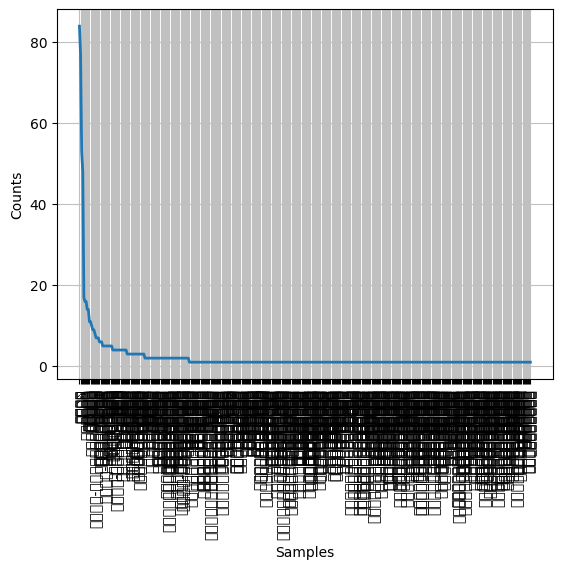

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fdist.plot()

In [ ]:
fdist.plot(50,cumulative=True)

In [ ]:
# stopwords
with open("sample_data/stop-words.txt", "r", encoding="utf-8") as file:
    kannada_stopwords = file.read().splitlines()
    kannada_stopwords
filtered_tokens = [word for word in text if word not in kannada_stopwords]
filtered_text = Text(filtered_tokens)

# Print results
print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)
len(filtered_tokens)

Original Tokens: ['ಮೊಮ್ಮಗನ', 'ಹೆಸರು', 'ಬಾಬು', '.', 'ಅವನಿಗೆ', 'ಚಿಕ್ಕಂದಿನಿಂದಲೇ', 'ಚಂದ್ರನ', 'ಬಗ್ಗೆ', 'ಆಕರ್ಷಣೆ', 'ಇತ್ತು', '.', 'ಬಾಬು', 'ತುಂಬಾ', 'ಚಿಕನ್', 'ಬೆಚ್ಚಗೆ', 'ಇಡುತ್ತಿದ್ದನು', ',', 'ಚಂದ್ರನೋ', 'ಚಂದನೋ', 'ಹೇಳಿದರೆ', 'ಅವನ', 'ಮುಖದಲ್ಲಿ', 'ಹಾಸ್ಯ', 'ಮೂಡುತ್ತಿತ್ತು', '.', 'ಹೊಂದುವಳಿಯಲ್ಲಿ', 'ಒಮ್ಮೆ', 'ಬಾಬು', 'ತನ್ನ', 'ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗುವ', 'ಕನಸು', 'ಕಂಡ', '.', '``', 'ಅಪ್ಪ', ',', 'ಅಮ್ಮ', '!', 'ನಾವು', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗಬೇಕಷ್ಟೇ', '!', "''", 'ಎಂದು', 'ಬಾಬು', 'ಆಕಾಂಕ್ಷೆಯಿಂದ', 'ಕೇಳಿದ', '.', 'ಅವನ', 'ತಂದೆ-ತಾಯಿ', 'ಬಾಬುವಿನ', 'ತಾತ್ಸಾರದಿಂದ', 'ಅನುಮಾನಿಸುತ್ತಿದ್ದರು', 'ಆದರೆ', 'ಅವರ', 'ಬಾಲದ', 'ಕಥೆ', 'ಕೇಳಿದ', 'ನಂತರ', 'ಅವರು', 'ದಿವಸ', 'ಪಯಣಕ್ಕೆ', 'ರೆಡಿಯಾದರು', '.', 'ಒಂದು', 'ಅಮಾವಾಸ್ಯೆಯ', 'ರಾತ್ರಿ', ',', 'ನಕ್ಷತ್ರಗಳು', 'ಪ್ರಕಾಶಮೀನಿದ್ದರು', '.', 'ಬಾಬು', ',', 'ತಂದೆ-ತಾಯಿ', ',', 'ಮೂರು', 'ಜನರು', 'ಆಕಾಶದತ್ತ', 'ದಿಟ್ಟಿಸಿ', 'ನೋಡಿದರು', '.', '``', 'ನಾವು', 'ಈಗ', 'ಚಂದ್ರನಿಗೆ', 'ಹೋಗುವುದು', 'ಹೇಗೆ', '?', "''", 'ಎಂದು', 'ಬಾಬು', 'ಕೇಳಿದ', '.', 'ಅವರ', 'ತಂದೆ', 'ನಗೆ', 'ಬಿಟ್ಟರು', '.', '``', 'ಬಾಬು', ',', 'ನಾವು', 'ಒಂದು', 'ವಿಶೇಷ', 'ವಿಮಾನವನ್ನು'

668

In [ ]:
# from nltk.probability import ConditionalFreqDist

Conditions: ['long', 'medium', 'short']
           ಅಸ್ತು  ಹಳ್ಳನಿಂದ      ತಮ್ಮ ತಾತ್ತ್ವಿಕ   ಬೆಳ್ಳಿಯ     ನೀಲಿಯ   ಮಧ್ಯೆಯೇ ಬಾಬುವನ್ನು      ಪಯಣದ  ಹಳ್ಳಕ್ಕೆ 
 short         0         0         0         0         0         0         0         0         0         0 
medium         1         0         3         0         0         1         0         0         1         0 
  long         0         1         0         1         1         0         1         1         0         1 


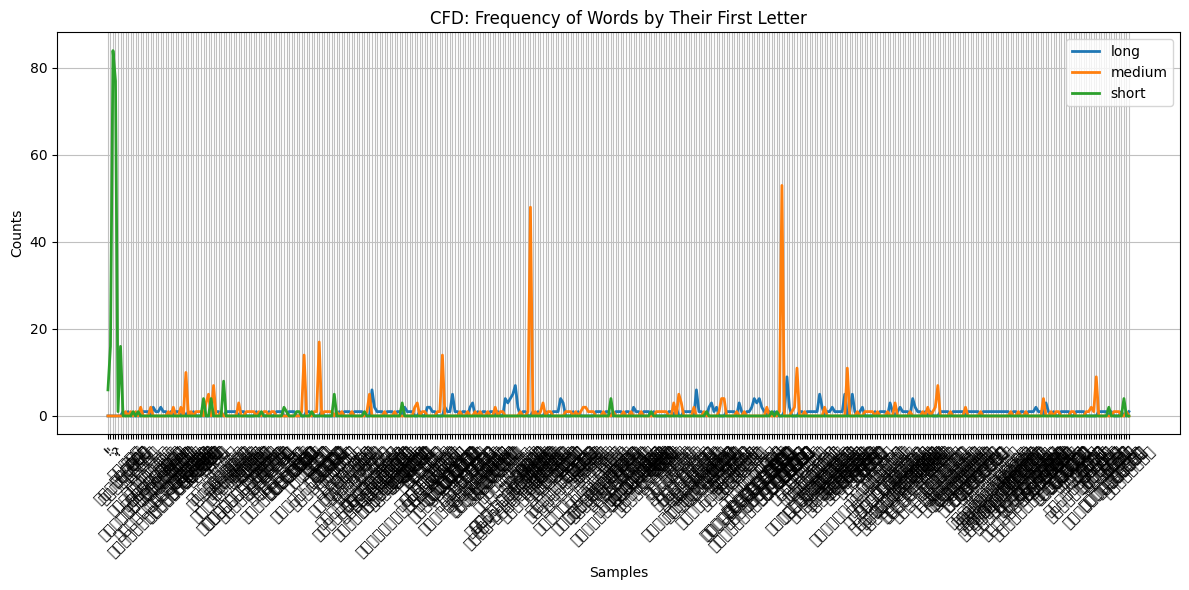

In [ ]:
# Categorizing words by length (short, medium, long)
categorized_words = [("short", word) if len(word) <= 3 else ("medium", word) if len(word) <= 6 else ("long", word) for word in tokens]

# Computing Conditional Frequency Distribution
cfd = ConditionalFreqDist(categorized_words)

# Display conditions
print("Conditions:", cfd.conditions())

# Tabulating the CFD
table_conditions = ["short", "medium", "long"]
table_samples = [word for word in set(tokens) if len(word) <= 10][:10]  # Limit to first 10 unique words for clarity
cfd.tabulate(conditions=table_conditions, samples=table_samples)

plt.figure(figsize=(12, 6))  # Customize plot size
cfd.plot(cumulative=False, title="CFD: Frequency of Words by Their First Letter")  # Plot without cumulative frequencies
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()


Conditions and Words: [('ಅ', 'ಅವನ'), ('ಅ', 'ಅವನ'), ('ಊ', 'ಊಟ'), ('ಅ', 'ಅವನ'), ('ಅ', 'ಅವನ'), ('ಅ', 'ಅದರ'), ('ಪ', 'ಪಯಣದ')]
Conditions (first letters): ['ಅ', 'ಊ', 'ಪ']


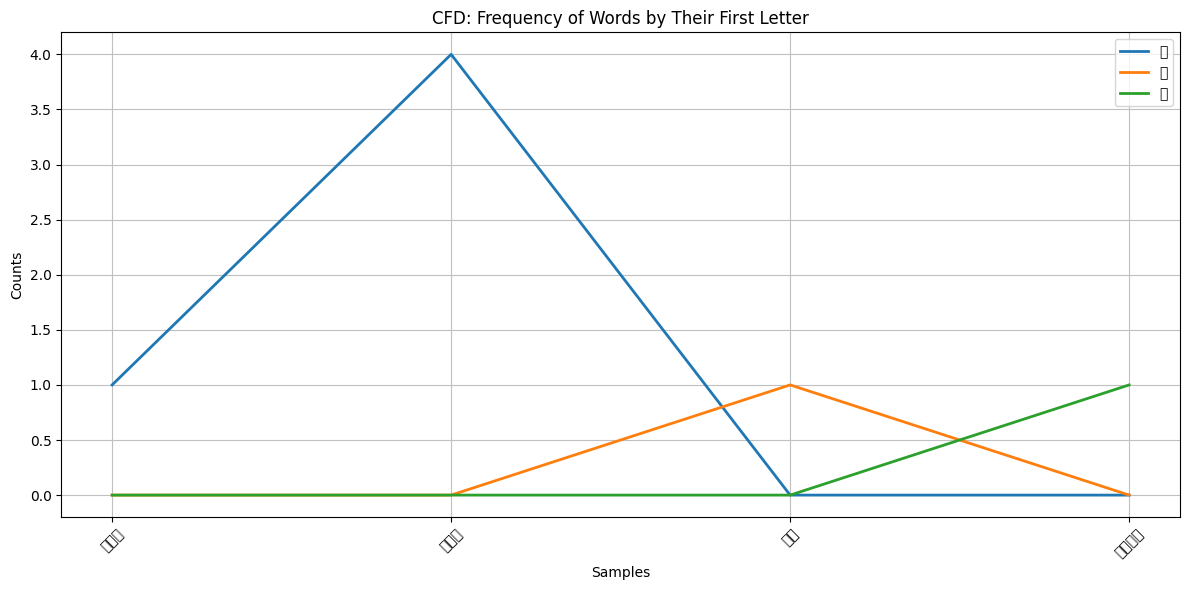

In [ ]:
# Conditional Frequency Distribution (CFD) with Word Lengths
from nltk.probability import ConditionalFreqDist
# print("Filtered Tokens:", filtered_tokens)

# Create a condition based on the first letter of each word
conditions_and_words = [(word[0], word) for word in filtered_tokens if word.isalnum()]
print("Conditions and Words:", conditions_and_words)

# Compute the Conditional Frequency Distribution
cfd = ConditionalFreqDist(conditions_and_words)

# Display conditions
print("Conditions (first letters):", cfd.conditions())

# Plot the Conditional Frequency Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Customize plot size
cfd.plot(cumulative=False, title="CFD: Frequency of Words by Their First Letter")  # Plot without cumulative frequencies
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()


In [ ]:
cfd = ConditionalFreqDist()
conditions =["ಚಂದ್ರನ", "ತಂದೆ-ತಾಯಿಗಳೊಂದಿಗೆ", "ಹಳ್ಳಿಯ"]

# Create Conditional Frequency Distribution
cfd = ConditionalFreqDist(
    (condition, word) for condition in conditions for word in tokens if condition in word
)
import matplotlib.pyplot as plt

# cfd.plot()
# Optional: Plot the CFD for visualization with improvements
import matplotlib.pyplot as plt

# Customize plot
plt.figure(figsize=(12, 6))  # Increase plot size for better readability
cfd.plot(cumulative=False)  # Plot without cumulative frequencies
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Conditional Frequency Distribution (CFD)")
plt.ylabel("Frequency")
plt.xlabel("Samples")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()



In [ ]:
# stopwords
with open("sample_data/stop-words.txt", "r", encoding="utf-8") as file:
    kannada_stopwords = file.read().splitlines()
    kannada_stopwords
filtered_tokens = [word for word in text if word not in kannada_stopwords]
filtered_text = Text(filtered_tokens)

# Print results
print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)
len(filtered_tokens)


In [ ]:
sorted(w for w in set(text) if w.endswith('ನ'))

In [ ]:
sorted(term for term in set(text) if 'ವ' in term)

In [ ]:
sorted(set(word.lower() for word in text if word.isalpha()))

In [ ]:
sorted(item for item in set(text) if item.istitle())

In [ ]:
sorted(w for w in set(text) if w.startswith('ವ'))

In [ ]:
sorted(w for w in set(tokens) if 'ನ' in w)